In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Employee.csv")
print(df.head())
print(df.shape)

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  
(4653, 9)


In [2]:
print(df.columns)
df.info()
df.describe()

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [175]:
print(df["Age"].max())
print(df["Age"].min())
print(df["LeaveOrNot"].value_counts())
print()
print(df["Education"].value_counts())
print()
print(df["EverBenched"].value_counts())
print()
ef = df["ExperienceInCurrentDomain"].value_counts()
print(ef.sort_values())

41
22
LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

EverBenched
No     4175
Yes     478
Name: count, dtype: int64

ExperienceInCurrentDomain
6       8
7       9
0     355
1     558
3     786
5     919
4     931
2    1087
Name: count, dtype: int64


In [ ]:
print(df[df["City"] == "Bangalore"].head())

    Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0   Bachelors         2017  Bangalore            3   34    Male          No   
3     Masters         2016  Bangalore            3   27    Male          No   
5   Bachelors         2016  Bangalore            3   22    Male          No   
7   Bachelors         2016  Bangalore            3   34  Female          No   
10    Masters         2012  Bangalore            3   27    Male          No   

    ExperienceInCurrentDomain  LeaveOrNot  
0                           0           0  
3                           5           1  
5                           0           0  
7                           2           1  
10                          5           1  

    Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
2   Bachelors         2014  New Delhi            3   38  Female          No   
6   Bachelors         2015  New Delhi            3   38    Male          No   
9     Masters         2

In [28]:
print(df.sort_values("Age").head())
print(df.sort_values("City").head())
print(df.sort_values("ExperienceInCurrentDomain",ascending = False).head())

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
4069    Masters         2013  New Delhi            2   22    Male         Yes   
4539  Bachelors         2014  Bangalore            3   22  Female          No   
4048  Bachelors         2014  Bangalore            3   22    Male          No   
4070  Bachelors         2015       Pune            1   22  Female          No   
4561  Bachelors         2013  Bangalore            3   22    Male          No   

      ExperienceInCurrentDomain  LeaveOrNot  
4069                          0           1  
4539                          0           0  
4048                          0           0  
4070                          0           1  
4561                          0           1  
      Education  JoiningYear       City  PaymentTier  Age Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34   Male          No   
2603  Bachelors         2013  Bangalore            3   26   Male          No 

In [26]:
print(df.groupby("City")["Age"].mean())
print(df.groupby("City")["JoiningYear"].value_counts())

City
Bangalore    29.594255
New Delhi    29.121003
Pune         29.288644
Name: Age, dtype: float64
City       JoiningYear
Bangalore  2014           387
           2017           369
           2013           340
           2015           314
           2016           313
           2012           302
           2018           203
New Delhi  2017           474
           2013           149
           2015           134
           2014           126
           2016            95
           2012            92
           2018            87
Pune       2015           333
           2017           265
           2014           186
           2013           180
           2016           117
           2012           110
           2018            77
Name: count, dtype: int64


Index(['City', 'Count'], dtype='object')


<BarContainer object of 3 artists>

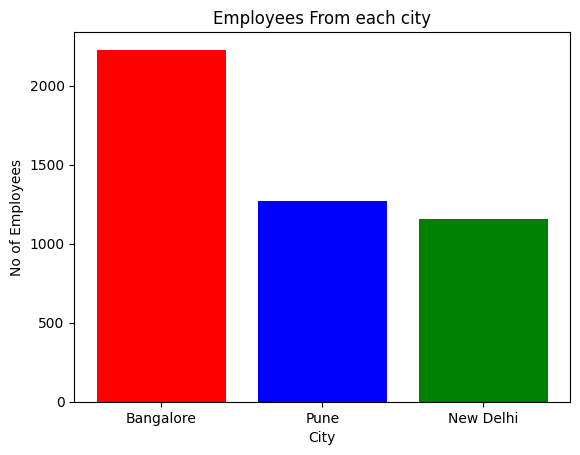

In [169]:
city = df["City"].value_counts().reset_index()
city.columns = ["City","Count"]
print(city.columns)
plt.title("Employees From each city")
plt.xlabel("City")
plt.ylabel("No of Employees")
plt.bar(city["City"],city["Count"], color = ["r","b","g"])

<BarContainer object of 3 artists>

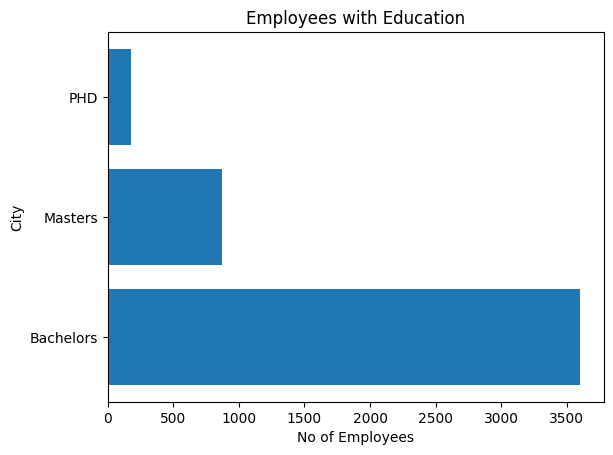

In [ ]:
edu = df["Education"].value_counts().reset_index()
edu.columns = ["Education","Count"]
plt.title("Employees with Education")
plt.ylabel("Education")
plt.xlabel("No of Employees")
plt.barh(edu["Education"],edu["Count"])

    Year  LeaveOrNot  Count
0   2012           0    395
2   2013           0    445
4   2014           0    526
6   2015           0    463
8   2016           0    408
10  2017           0    811
13  2018           0      5


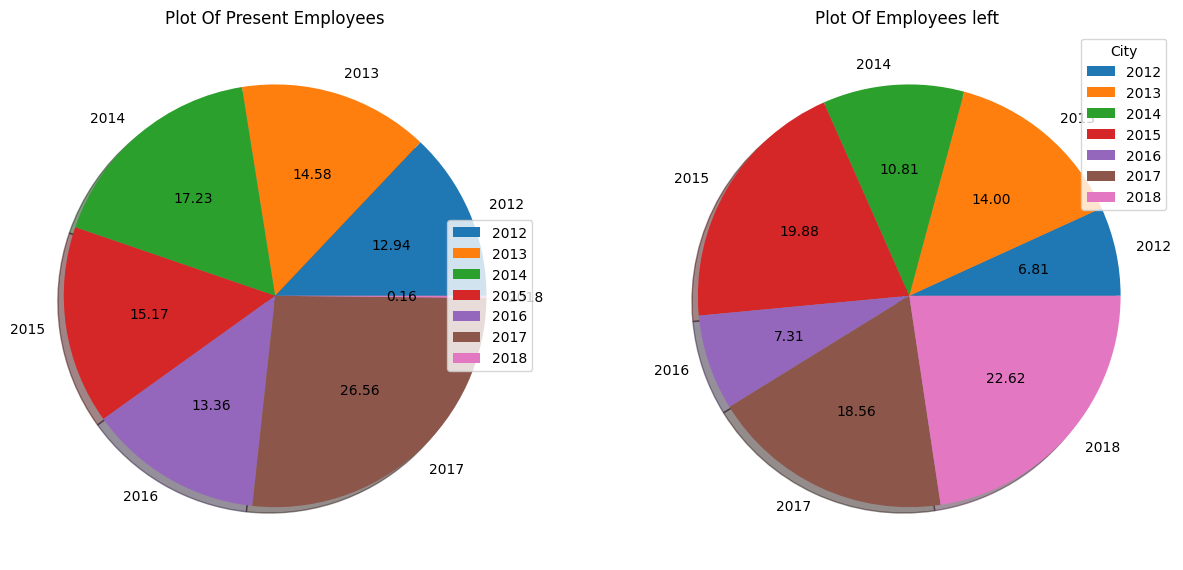

In [127]:
ln = df.groupby("JoiningYear")["LeaveOrNot"].value_counts().reset_index()
ln.columns = ["Year","LeaveOrNot","Count"]
present = ln[ln["LeaveOrNot"] == 0]
left = ln[ln["LeaveOrNot"] == 1]
print(present)
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.pie(present["Count"],autopct= "%.2f",shadow= 0.5,labels=present["Year"])
plt.legend(loc = "right")
plt.title("Plot Of Present Employees")

plt.subplot(1,2,2)
plt.pie(left["Count"],autopct= "%.2f",shadow= 0.5,labels=left["Year"])
plt.legend(
    title="City",
    loc = "upper right",
    bbox_to_anchor=(1,1),
)
plt.title("Plot Of Employees left ")
plt.show()

   JoiningYear  count
5         2012    504
3         2013    669
2         2014    699
1         2015    781
4         2016    525
0         2017   1108
6         2018    367


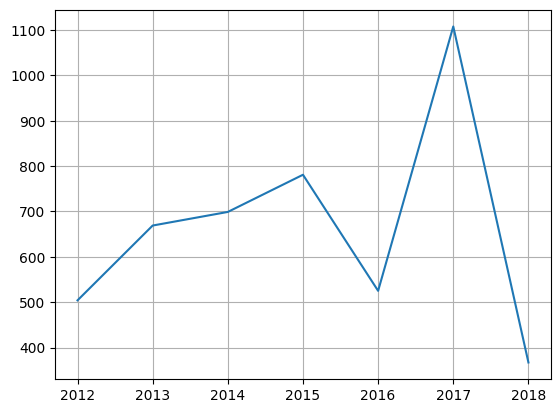

In [156]:
year = df.sort_values("JoiningYear")
y = year["JoiningYear"].value_counts().reset_index()
y.columns = ["JoiningYear", "count"]
y = y.sort_values("JoiningYear")
plt.plot(y["JoiningYear"], y["count"])
plt.grid()
print(y)

([<matplotlib.axis.XTick at 0x16ea3074050>,
 [Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(30, 0, '30'),
  Text(32, 0, '32'),
  Text(34, 0, '34'),
  Text(36, 0, '36'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(44, 0, '44'),
  Text(46, 0, '46'),
  Text(48, 0, '48')])

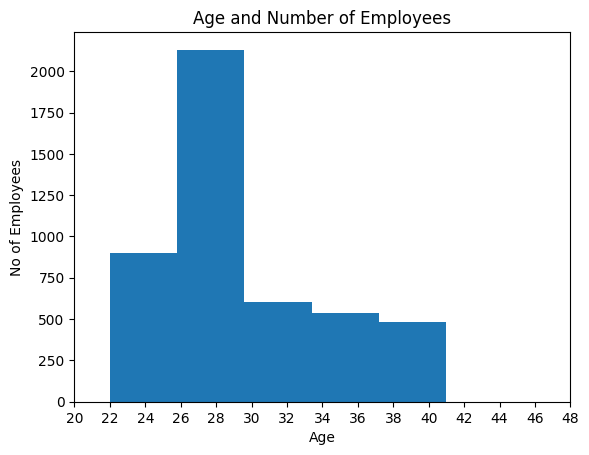

In [174]:
plt.hist(df["Age"],bins = 5)
plt.title("Age and Number of Employees")
plt.xlabel("Age")
plt.ylabel("No of Employees")
plt.xticks([i for i in range(20,50,2)])

Text(0, 0.5, 'ExperienceInCurrentDomain')

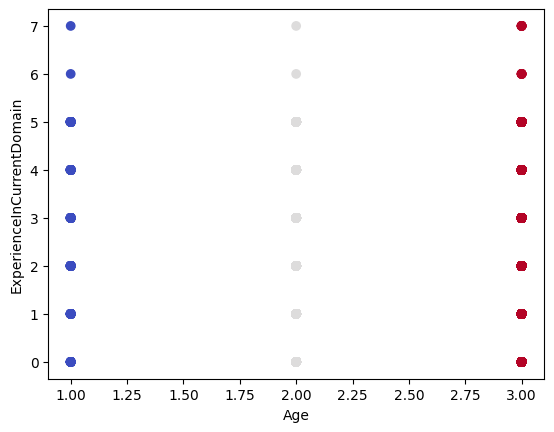

In [141]:
plt.scatter(df["PaymentTier"],df["ExperienceInCurrentDomain"],cmap = "coolwarm", c = df["PaymentTier"])
plt.xlabel("Age")
plt.ylabel("ExperienceInCurrentDomain")